In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
DataDir = "/home/onimem/work/Open_world/NBA/original"

from subprocess import check_output
print(check_output(["ls", DataDir]).decode("utf8"))

Players.csv
Seasons_Stats.csv
player_data.csv



In [2]:
# Players.csv
players=pd.read_csv(DataDir + '/Players.csv')
players.drop('Unnamed: 0', axis=1, inplace=True)
players.dropna(how='all',inplace=True)
print(players.shape)
players.head()

(3921, 7)


,Player,height,weight,collage,born,birth_city,birth_state
0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky


In [3]:
# Seasons_Stats.csv
seasons=pd.read_csv(DataDir + '/Seasons_Stats.csv')
seasons.drop('Unnamed: 0', axis=1, inplace=True)
seasons.dropna(how='all',inplace=True)
print(seasons.shape)
seasons.head()

(24624, 52)


,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [4]:
node = pd.merge(seasons, players)
print(node.shape)
node.head()

(24624, 58)


,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,BLK,TOV,PF,PTS,height,weight,collage,born,birth_city,birth_state
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,...,NaN,NaN,217.0,458.0,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,1951.0,Curly Armstrong,G-F,32.0,FTW,38.0,NaN,NaN,NaN,0.372,...,NaN,NaN,97.0,202.0,180.0,77.0,Indiana University,1918.0,NaN,NaN
2,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,...,NaN,NaN,99.0,279.0,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
3,1951.0,Cliff Barker,SG,30.0,INO,56.0,NaN,NaN,NaN,0.322,...,NaN,NaN,98.0,152.0,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
4,1952.0,Cliff Barker,SG,31.0,INO,44.0,NaN,494.0,10.8,0.343,...,NaN,NaN,56.0,126.0,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana


In [5]:
node.dropna(axis=1, inplace=True)
print(node.shape)
node.head()

(24624, 17)


,Year,Player,Pos,Tm,G,FG,FGA,2P,2PA,FT,FTA,AST,PF,PTS,height,weight,born
0,1950.0,Curly Armstrong,G-F,FTW,63.0,144.0,516.0,144.0,516.0,170.0,241.0,176.0,217.0,458.0,180.0,77.0,1918.0
1,1951.0,Curly Armstrong,G-F,FTW,38.0,72.0,232.0,72.0,232.0,58.0,90.0,77.0,97.0,202.0,180.0,77.0,1918.0
2,1950.0,Cliff Barker,SG,INO,49.0,102.0,274.0,102.0,274.0,75.0,106.0,109.0,99.0,279.0,188.0,83.0,1921.0
3,1951.0,Cliff Barker,SG,INO,56.0,51.0,202.0,51.0,202.0,50.0,77.0,115.0,98.0,152.0,188.0,83.0,1921.0
4,1952.0,Cliff Barker,SG,INO,44.0,48.0,161.0,48.0,161.0,30.0,51.0,70.0,56.0,126.0,188.0,83.0,1921.0


In [6]:
node['Age'] = node['Year'] - node['born']
node.drop(columns = 'born', inplace=True)

In [7]:
multiple = []
for name in players['Player']:
    cond = 'Player == "' + name + '"'
    tmp_pd = node.query(cond)
    l = {}
    for year in tmp_pd['Year']:
        if year in l.keys():
            l[year] += 1
        else:
            l[year] = 1
    for i in [2,3,4,5,6]:
        if i in l.values():
            multiple.append(name)
            break
print(len(multiple))

1494


In [8]:
miss = node.query('Age > 36')['Player'].unique()
for i in range(len(node)):
    if node.loc[i, 'Player'] in multiple or node.loc[i, 'Tm'] == 'TOT' or node.loc[i, 'Player'] in miss:
        node = node.drop(i)
print(node.shape)
node.head()

(7952, 17)


,Year,Player,Pos,Tm,G,FG,FGA,2P,2PA,FT,FTA,AST,PF,PTS,height,weight,Age
0,1950.0,Curly Armstrong,G-F,FTW,63.0,144.0,516.0,144.0,516.0,170.0,241.0,176.0,217.0,458.0,180.0,77.0,32.0
1,1951.0,Curly Armstrong,G-F,FTW,38.0,72.0,232.0,72.0,232.0,58.0,90.0,77.0,97.0,202.0,180.0,77.0,33.0
2,1950.0,Cliff Barker,SG,INO,49.0,102.0,274.0,102.0,274.0,75.0,106.0,109.0,99.0,279.0,188.0,83.0,29.0
3,1951.0,Cliff Barker,SG,INO,56.0,51.0,202.0,51.0,202.0,50.0,77.0,115.0,98.0,152.0,188.0,83.0,30.0
4,1952.0,Cliff Barker,SG,INO,44.0,48.0,161.0,48.0,161.0,30.0,51.0,70.0,56.0,126.0,188.0,83.0,31.0


In [9]:
node = node[['Player', 'Year', 'Tm', 'Pos', 'Age', 'height', 'weight', 'G',  'FG', 'FGA', '2P', '2PA',  'FT', 'FTA', 'AST', 'PF',  'PTS']]
csv = node.reset_index()
csv.drop(columns = 'index', inplace=True)
csv.to_csv("graph/node.csv")

# graph

In [10]:
csv = csv.sort_values('Year')[['Year', 'Player', 'Tm', 'Pos', 'Age', 'height', 'weight', 'G',  'FG', 'FGA', '2P', '2PA',  'FT', 'FTA', 'AST', 'PF',  'PTS']]
data = csv.reset_index()
data.drop(columns = 'index', inplace=True)

In [11]:
data

,Year,Player,Tm,Pos,Age,height,weight,G,FG,FGA,2P,2PA,FT,FTA,AST,PF,PTS
0,1950.0,Curly Armstrong,FTW,G-F,32.0,180.0,77.0,63.0,144.0,516.0,144.0,516.0,170.0,241.0,176.0,217.0,458.0
1,1950.0,Leo Klier,FTW,F-G,27.0,188.0,77.0,66.0,157.0,516.0,157.0,516.0,141.0,190.0,121.0,177.0,455.0
2,1950.0,Lee Knorek,BLB,C,29.0,201.0,97.0,1.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,4.0,0.0
3,1950.0,Milo Komenich,AND,F-C,30.0,201.0,96.0,64.0,244.0,861.0,244.0,861.0,146.0,250.0,124.0,246.0,634.0
4,1950.0,Leo Kubiak,WAT,G,23.0,180.0,72.0,62.0,259.0,794.0,259.0,794.0,192.0,236.0,201.0,250.0,710.0
5,1950.0,Walt Lautenbach,SHE,G-F,28.0,188.0,83.0,55.0,100.0,332.0,100.0,332.0,38.0,55.0,73.0,122.0,238.0
6,1950.0,Tony Lavelli,BOS,F,24.0,190.0,83.0,56.0,162.0,436.0,162.0,436.0,168.0,197.0,40.0,107.0,492.0
7,1950.0,Ed Leede,BOS,F-G,23.0,190.0,83.0,64.0,174.0,507.0,174.0,507.0,223.0,316.0,130.0,167.0,571.0
8,1950.0,Andrew Levane,SYR,F-G,30.0,188.0,86.0,60.0,139.0,418.0,139.0,418.0,54.0,85.0,156.0,106.0,332.0
9,1950.0,John Logan,STB,G,29.0,188.0,79.0,62.0,251.0,759.0,251.0,759.0,253.0,323.0,240.0,206.0,755.0


In [12]:
# チーム名書き換え

allteam = []
for team in data['Tm'].unique():
    allteam.append(team)

#import  re
#text = "ATL…アトランタ・ホークス。BRK…ブルックリン・ネッツ。前の本拠地はニュージャージー。BOS…ボストン・セルティックス。CHA…シャーロット・ホーネッツ。CHI…シカゴ・ブルス。CLE…クリーブランド・キャバリアーズ。キャブスとも。DAL…ダラス・マーベリックス。マブスとも。DEN…デンバー・ナゲッツ。DET…デトロイト・ピストンズ。GSW…ゴールデンステート・ウォリアーズ。本拠地オラクルアリーナで滅法強い。HOU…ヒューストン・ロケッツ。本拠地アリーナはトヨタ・センター。IND…インディアナ・ペイサーズ。LAC…ロサンゼルス・クリッパーズLAL…ロサンゼルス・レイカーズ。MEM…メンフィス・グリズリーズ。前の本拠地はバンクーバー。MIA…マイアミ・ヒート。MIL…ミルウォーキー・バックス。MIN…ミネソタ・ティンバーウルブズ。NOP…ニューオーリンズ・ペリカンズ 。NYK…ニューヨーク・ニックス。本拠地アリーナは世界的に有名なマディソンスクエアガーデン。OKC…オクラホマシティ・サンダー。前の本拠地はシアトル（・スーパーソニックス）。ORL…オランド・マジック。PHO…フェニックス・サンズ。PHI…フィラデルフィア・76ers。POR…ポートランド・トレイルブレイザーズ。SAC…サクラメント・キングス。SAS…サンアントニオ・スパーズ。TOR…トロント・ラプターズ。UTA…ユタ・ジャズWAS…ワシントン・ウィザーズ。前のチーム名はブレッツ。"

#upperReg = re.compile(r'^[A-Z]+$')
#def isupper(s):
#    return upperReg.match(s) is not None

#text2 = ""
#for s in text:
#    if isupper(s):
#        text2 += s
#    else:
#        text2 += ' '
#activeteam = text2.split()

activeteam = ['ATL', 'BRK', 'BOS', 'CHA', 'CHI', 'CLE', 'DAL', 'DEN', 'DET', 'GSW', 'HOU', 'IND', 'LAC', 'LAL', 'MEM', 'MIA', 'MIL', 'MIN', 'NOP', 'NYK', 'OKC', 'ORL', 'PHO', 'PHI', 'POR', 'SAC', 'SAS', 'TOR', 'UTA', 'WAS']

oldteam = []
for i in allteam:
    if i not in activeteam:
        oldteam.append(i)

mergeteam = ['TRI', 'MLH' ,'STL', 'NYN', 'NJN', 'CHO', 'CHH', 'FTW', 'PHW', 'SFW', 'SDR', 'BUF', 'SDC', 'MNL', 'VAN', 'NOH', 'NOK', 'SEA', 'SYR', 'ROC', 'CIN', 'KCO', 'KCK', 'NOJ', 'CHP', 'CHZ', 'BAL', 'CAP', 'WSB']
defunctteam = list(set(oldteam) - set(mergeteam))

print(len(allteam), len(activeteam), len(mergeteam), len(defunctteam))

merge_dic = {}
merge_dic['ATL'] = ['TRI', 'MLH', 'STL']
merge_dic['BRK'] = ['NYN', 'NJN']
merge_dic['CHA'] = ['CHO', 'CHH']
merge_dic['DET'] = ['FTW']
merge_dic['GSW'] = ['PHW', 'SFW']
merge_dic['HOU'] = ['SDR']
merge_dic['LAC'] = ['BUF', 'SDC']
merge_dic['LAL'] = ['MNL']
merge_dic['MEM'] = ['VAN']
merge_dic['NOP'] = ['NOH', 'NOK']
merge_dic['OKC'] = ['SEA']
merge_dic['PHI'] = ['SYR']
merge_dic['SAC'] = ['ROC', 'CIN', 'KCO', 'KCK']
merge_dic['UTA'] = ['NOJ']
merge_dic['WAS'] = ['CHP', 'CHZ', 'BAL', 'CAP', 'WSB']

for k, v in merge_dic.items():
    for i in v:
        data.replace(i, k, inplace=True)

data

68 30 29 9


,Year,Player,Tm,Pos,Age,height,weight,G,FG,FGA,2P,2PA,FT,FTA,AST,PF,PTS
0,1950.0,Curly Armstrong,DET,G-F,32.0,180.0,77.0,63.0,144.0,516.0,144.0,516.0,170.0,241.0,176.0,217.0,458.0
1,1950.0,Leo Klier,DET,F-G,27.0,188.0,77.0,66.0,157.0,516.0,157.0,516.0,141.0,190.0,121.0,177.0,455.0
2,1950.0,Lee Knorek,BLB,C,29.0,201.0,97.0,1.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,4.0,0.0
3,1950.0,Milo Komenich,AND,F-C,30.0,201.0,96.0,64.0,244.0,861.0,244.0,861.0,146.0,250.0,124.0,246.0,634.0
4,1950.0,Leo Kubiak,WAT,G,23.0,180.0,72.0,62.0,259.0,794.0,259.0,794.0,192.0,236.0,201.0,250.0,710.0
5,1950.0,Walt Lautenbach,SHE,G-F,28.0,188.0,83.0,55.0,100.0,332.0,100.0,332.0,38.0,55.0,73.0,122.0,238.0
6,1950.0,Tony Lavelli,BOS,F,24.0,190.0,83.0,56.0,162.0,436.0,162.0,436.0,168.0,197.0,40.0,107.0,492.0
7,1950.0,Ed Leede,BOS,F-G,23.0,190.0,83.0,64.0,174.0,507.0,174.0,507.0,223.0,316.0,130.0,167.0,571.0
8,1950.0,Andrew Levane,PHI,F-G,30.0,188.0,86.0,60.0,139.0,418.0,139.0,418.0,54.0,85.0,156.0,106.0,332.0
9,1950.0,John Logan,STB,G,29.0,188.0,79.0,62.0,251.0,759.0,251.0,759.0,253.0,323.0,240.0,206.0,755.0


Populating the interactive namespace from numpy and matplotlib


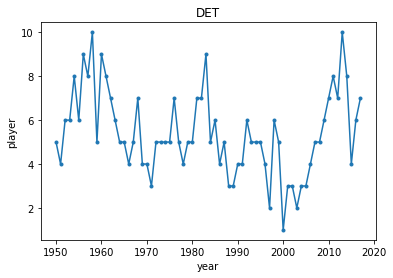

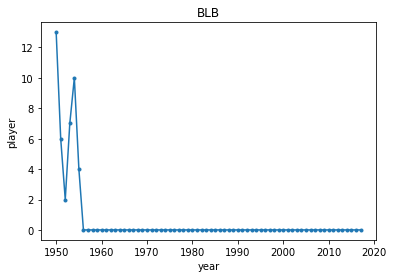

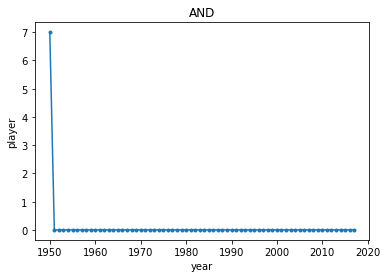

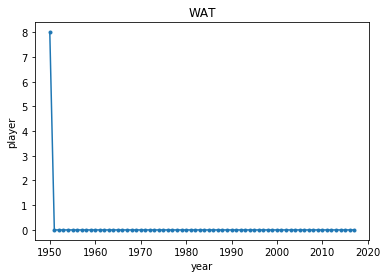

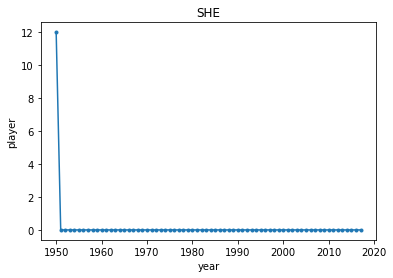

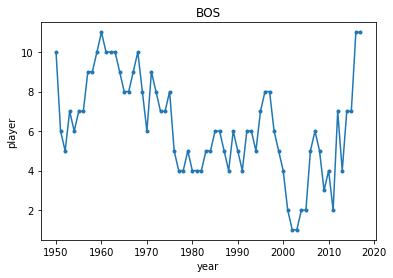

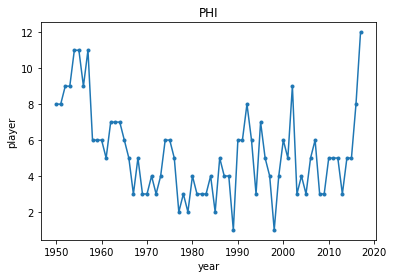

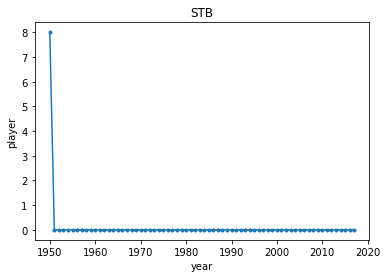

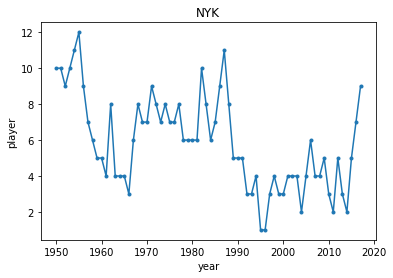

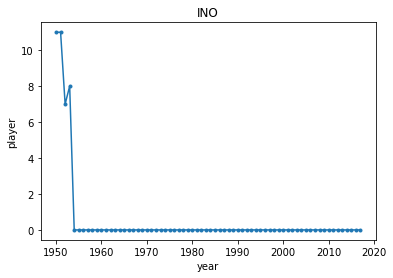

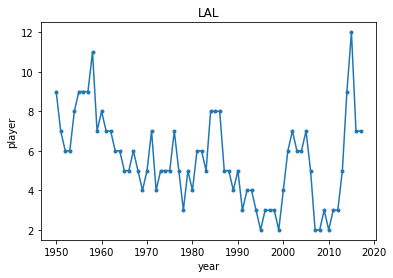

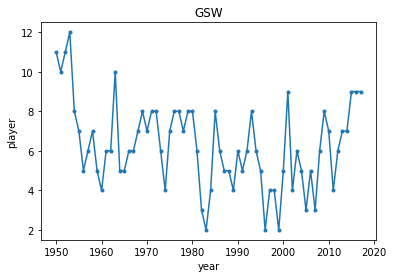

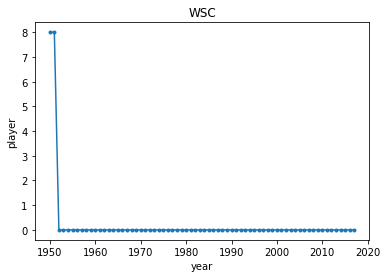

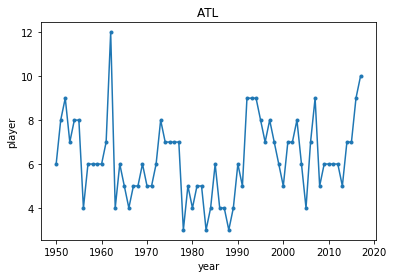

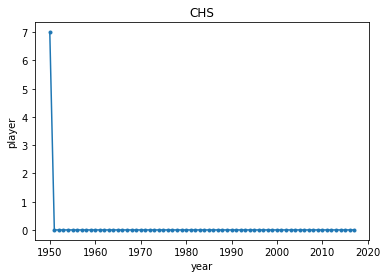

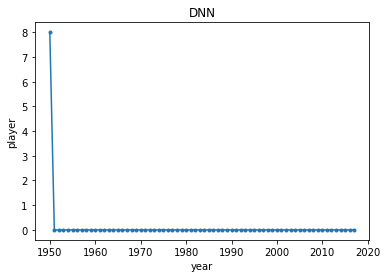

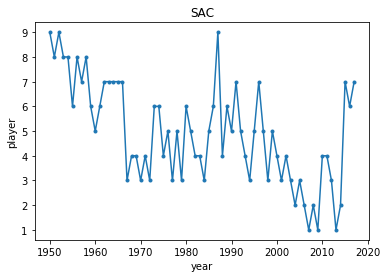

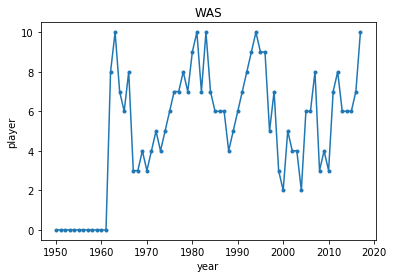

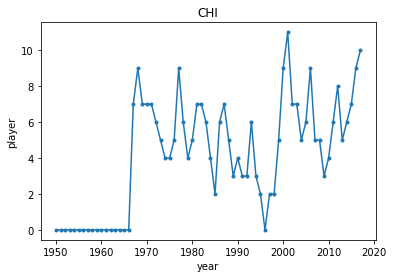

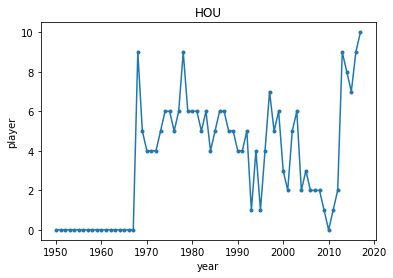

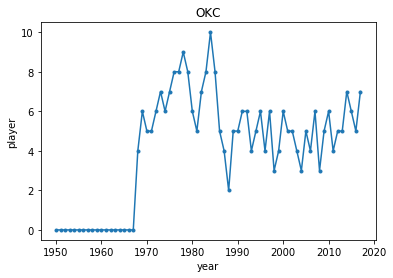

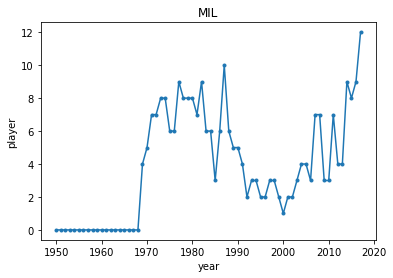

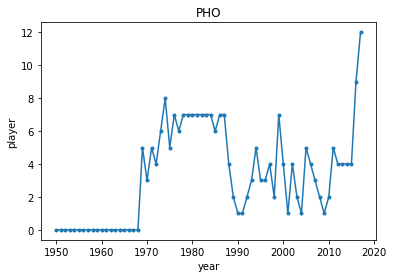

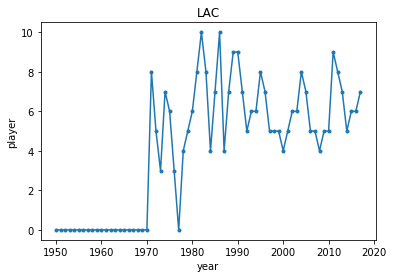

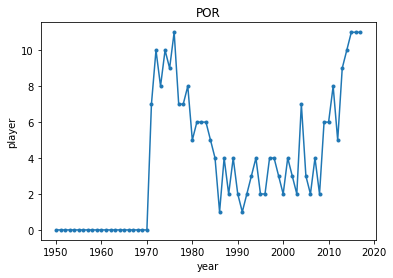

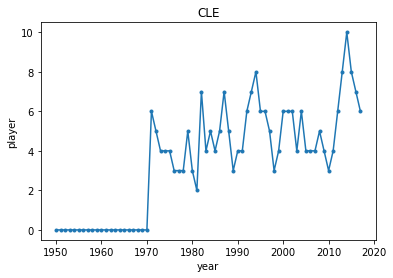

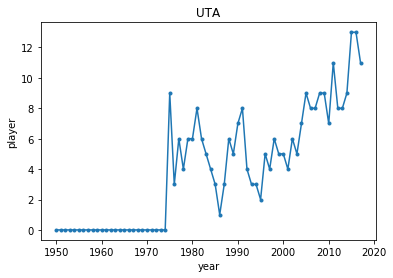

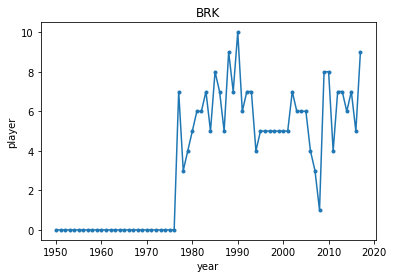

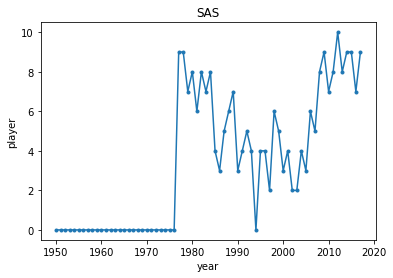

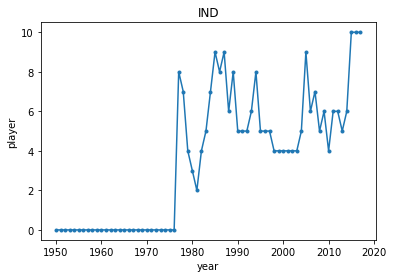

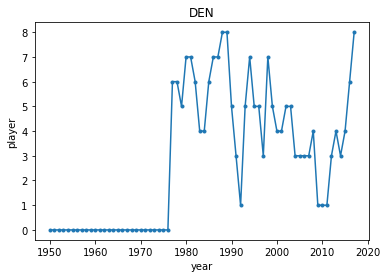

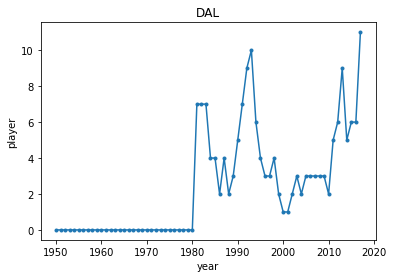

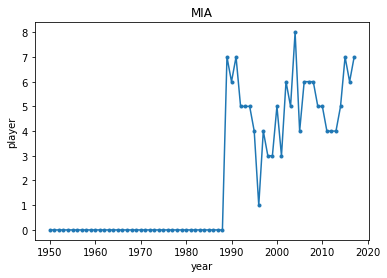

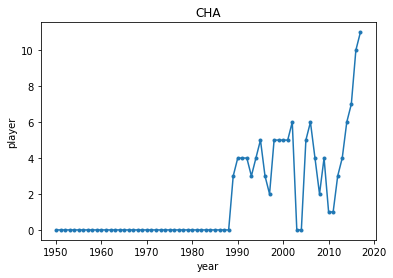

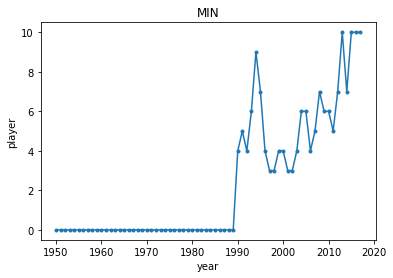

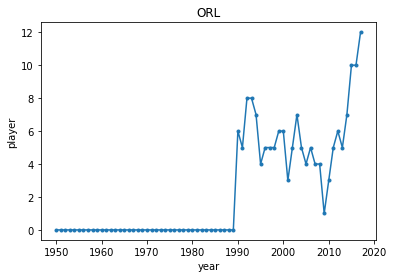

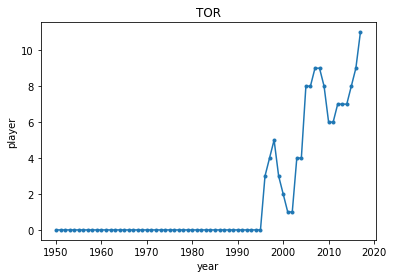

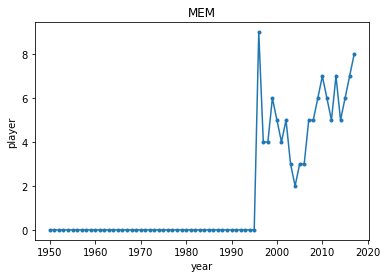

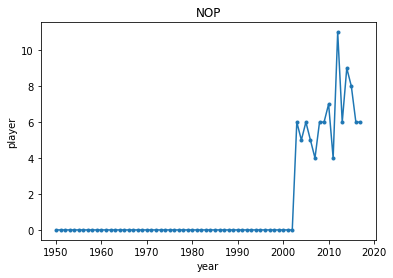

In [13]:
%pylab inline --no-import-all
def plot_history(history, team, save_name):

    plt.plot(history['year'], history['player'], marker=".")
    plt.title(team)
    plt.xlabel('year')
    plt.ylabel('player')
    plt.savefig(save_name)
    plt.show()

def get_history(tm, years):
    num_of_players = []
    for k, v in tm.items():
        num_of_players.append(v)
    history = {}
    history['year'] = years
    history['player'] = num_of_players
    return history

years = [i for i in range(1950,2018)]
cnt = {}
for team in data['Tm'].unique():
    cnt[team] = {}

for year in years:
    df_per_year = data.query('Year == "' + str(year) + '"')
    for team in data['Tm'].unique():
        if team in df_per_year['Tm'].unique():
            cnt[team][year] = df_per_year.groupby(['Tm']).count()['Player'][team]
        else:
            cnt[team][year] = 0

for team in data['Tm'].unique():
    history = get_history(cnt[team], years)
    plot_history(history, team, "cnt/cnt_" + team + ".png")        

In [109]:
# player_data.csv
player_data=pd.read_csv(DataDir + '/player_data.csv')
player_data.dropna(how='all',inplace=True)
print(player_data.shape)
player_data.head()
player_data.groupby('name').count().sort_values(by='height',ascending=False)[:48] # 47人の同姓同名

(4550, 8)


,year_start,year_end,position,height,weight,birth_date,college
name,,,,,,,
Charles Jones,3,3,3,3,3,3,3
George Johnson,3,3,3,3,3,3,3
Charles Smith,3,3,3,3,3,3,3
Chris Wright,2,2,2,2,2,2,2
Reggie Williams,2,2,2,2,2,2,2
Chris Smith,2,2,2,2,2,2,2
Larry Nance,2,2,2,2,2,2,2
Matt Guokas,2,2,2,2,2,2,2
Bobby Wilson,2,2,2,2,2,2,2


In [110]:
num_per_samename = list(player_data.groupby('name').count().sort_values(by='height',ascending=False)['year_start']) # nameあたりの人数
num_per_samename = [num for num in num_per_samename if num > 1] # nameあたりの人数(同姓同名のみ)
samename_unique = len(num_per_samename) # 同姓同名の種類数
name_samename = list(player_data.groupby('name').count().sort_values(by='height',ascending=False)['year_start'][:samename_unique].index) # 同姓同名の種類
samename_dic = {}
for i in range(samename_unique):
    samename_dic[name_samename[i]] = num_per_samename[i]
samename_dic

new_player_data = player_data.copy()

for name, num in samename_dic.items():
    query_str = 'name == "' + name + '"'
    subset = new_player_data.query(query_str)
    #new_seasons.loc[subset.index, 'Player'] = b
    #print(subset.index)
    new_name = []
    for i in range(num):
        new_name.append(name+ ' ' +str(i))
    #print(new_name)
    new_player_data.loc[subset.index, 'name'] = new_name

new_player_data.to_csv("new_player_data.csv")

In [114]:
# aaa : Players.csvのname
# bbb : player_data.csvのname
# ccc : Players.csvにあってplayer_data.csvにはない、*印が付いているもの以外のname(名前が略されてるものか、ほんとにないもの)
# ddd : Players.csvで省略されてた選手名とフルネームの辞書
# fff : Players.csvで省略されてた選手の略称
# eee : Players.csvで*印が付いてた選手の*付きname

new_players = players.copy()
new_seasons = seasons.copy()
player_data = new_player_data

print(new_players.shape)
print(new_seasons.shape)

aaa = []
for player in players['Player']:
    aaa.append(player)
print(len(aaa))

bbb = []
for name in player_data['name']:
    bbb.append(name)
print(len(bbb))

ccc = []
for a in aaa:
    if a not in bbb:
        if '*' not in a:
            ccc.append(a)
print(len(ccc))
print(new_players.shape)

ddd = {}

for c in ccc:
    ddd[c] = []

for c in ccc:
    for b in bbb:
        if (c in b) and (b.replace(c, '')[0] == ' '):
            
            # Season_Stats.csvの書き換え
            year_start = list(player_data.query('name == "' + b + '"')['year_start'])[0]
            year_end = list(player_data.query('name == "' + b + '"')['year_end'])[0]
            born = float(list(player_data.query('name == "' + b + '"')['birth_date'])[0].split(', ')[1])
            print(year_start, year_end)
            for season_year in range(year_start, year_end+1):
                age = season_year - born -1
                query_str = 'Player == "' + c + '" and Year == ' + str(season_year) + ' and Age ==' + str(age)
                subset = new_seasons.query(query_str)
                new_seasons.loc[subset.index, 'Player'] = b
            
            # Players.csvの書き換え
            new_players = new_players.drop(new_players[new_players.Player == c].index)
            ddd[c].append(b)
            new_Player = b
            new_height = list(players.query('Player == "' + c + '"')['height'])[0] #copyのため後で修正
            new_weight = list(players.query('Player == "' + c + '"')['weight'])[0] #copyのため後で修正
            new_collage = list(player_data.query('name == "' + b + '"')['college'])[0]
            print(b)
            new_born = float(list(player_data.query('name == "' + b + '"')['birth_date'])[0].split(', ')[1])
            new_birthcity = list(players.query('Player == "' + c + '"')['birth_city'])[0] #copyのため後で修正
            new_birthstate = list(players.query('Player == "' + c + '"')['birth_state'])[0] #copyのため後で修正
            tmp = pd.DataFrame([[new_Player, new_height, new_weight, new_collage, new_born, new_birthcity, new_birthstate]], columns=['Player','height','weight','collage','born','birth_city','birth_state'])
            new_players = new_players.append(tmp, ignore_index=True)

print(ddd)
print(new_players.shape)

eee = []
for a in aaa:
    if '*' in a:
        eee.append(a)
        new_players.replace(a, a.replace('*', ''), inplace=True)
        new_seasons.replace(a, a.replace('*', ''), inplace=True)
print(len(eee))
new_players.to_csv("new_players.csv")
new_seasons.to_csv("new_seasons.csv")
print(new_players.shape)
print(new_seasons.shape)

(3921, 7)
(24624, 52)
3921
4550
75
(3921, 7)
1950 1952
Wah Wah Jones
1949 1950
Freddie Lewis 0
1967 1977
Freddie Lewis 1
1947 1950
Butch Van Breda Kolff
1950 1950
Whitey Von Nieda
1955 1955
Jack Turner 0
1962 1962
Jack Turner 1
1957 1958
Jim Paxson 0
1980 1990
Jim Paxson 1
1958 1963
Hot Rod Hundley
1987 1999
Hot Rod Williams
1962 1962
George Bon Salle
1947 1947
Bob Duffy 0
1963 1965
Bob Duffy 1
1965 1972
Luke Jackson 0
2005 2008
Luke Jackson 1
1966 1977
Dick Van Arsdale
1966 1977
Tom Van Arsdale
1947 1947
Matt Guokas 0
1967 1976
Matt Guokas 1
1969 1976
Greg Smith 0
2012 2016
Greg Smith 1
1969 1970
Sam Williams 0
1982 1985
Sam Williams 1
1970 1973
Mike Davis 0
1983 1983
Mike Davis 1
1970 1979
Norm Van Lier
1993 1995
Jo Jo English
1970 1981
Jo Jo White
1971 1974
George Johnson 0
1973 1986
George Johnson 1
1979 1986
George Johnson 2
1968 1975
Roger Brown 0
1973 1980
Roger Brown 1
1968 1969
Dan Anderson 0
1975 1976
Dan Anderson 1
1949 1949
Don Smith 0
1975 1975
Don Smith 1
1968 1968
Bobby 